In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Plotting Options
import scienceplots
plt.style.use(["science", "nature", "grid"]) # Can also add the style: "grid"

In [2]:
NID = pd.read_csv("NID.csv", header=1, low_memory=False)
NID.columns = [c.replace(' ', '_') for c in NID.columns]
NID

,Dam_Name,Other_Names,Former_Names,NID_ID,Other_Structure_ID,Federal_ID,Owner_Names,Owner_Types,Primary_Owner_Type,Number_of_Associated_Structures,...,Inspection_Frequency,Hazard_Potential_Classification,Condition_Assessment,Condition_Assessment_Date,EAP_Prepared,EAP_Last_Revision_Date,Website_URL,Operational_Status,Operational_Status_Date,American_Indian/Alaska_Native/Native_Hawaiian
0,Aichi Forge Usa Dam,Aichi Forge Usa Lake,NaN,KY00728,NaN,KY00728,AICHI,Private,Private,0.0,...,5.0,Low,Not Rated,NaN,Not Required,NaN,https://damsafety.org/kentucky,NaN,NaN,NaN
1,Oxy Usa Retention Pond,NaN,NaN,ND01160,NaN,ND01160,OXY USA Inc.,Private,Private,NaN,...,NaN,Low,Not Rated,NaN,Not Required,NaN,https://damsafety.org/north-dakota,NaN,NaN,NaN
2,Dod Usa 2,NaN,Dod Usa,OK20994,NaN,OK20994,DEPT. OF DEFENSE/US ARMY RESERVE CENTER,Federal,Federal,0.0,...,5.0,Low,Not Rated,NaN,Not Required,NaN,https://damsafety.org/oklahoma,NaN,NaN,Cherokee OTSA
3,Dod Usa 4,NaN,Dod Usa,OK20998,NaN,OK20998,DEPT. OF DEFENSE/US ARMY RESERVE CENTER,Federal,Federal,0.0,...,5.0,Low,Not Rated,NaN,Not Required,NaN,https://damsafety.org/oklahoma,NaN,NaN,Cherokee OTSA
4,Exxonmobil Coal Usa/Mine 2/Freshwater Lake Dam,NaN,Monterey Coal Co/Mine 2/Freshwater Lake Dam,IL50527,NaN,IL50527,EXXONMOBIL ENVIRONMENTAL SERVICES COMPAN,Private,Private,0.0,...,5.0,Low,Not Available,NaN,No,NaN,https://damsafety.org/illinois,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91871,Bluestone Dam,Bluestone Lake,NaN,WV08902,NaN,WV08902,USACE - Huntington District,Federal,Federal,0.0,...,5.0,High,Not Available,NaN,Yes,2018-01-30,https://www.lrh.usace.army.mil/Missions/Civil-...,Under Remediation,2013-09-18,NaN
91872,Foster Dam,Foster Lake,NaN,OR00012,NaN,OR00012,USACE - Portland District,Federal,Federal,0.0,...,5.0,High,Not Available,NaN,Yes,2008-08-25,https://www.nwp.usace.army.mil/Locations/Willa...,"Under Investigation, Planning, Permitting, or ...",2016-05-13,NaN
91873,Lockport Lock and Controlling Works,NaN,Lockport Lock and Dam,IL00007,NaN,IL00007,USACE - Chicago District,Federal,Federal,0.0,...,1.0,High,Not Available,NaN,Yes,2009-03-01,https://www.usace.army.mil/Missions/Civil-Work...,Normal Operations,2022-09-09,NaN
91874,Lewisville Dam,NaN,Garza Little Elm Dam,TX00008,NaN,TX00008,USACE - Fort Worth District,Federal,Federal,0.0,...,5.0,High,Not Available,NaN,Yes,2021-09-24,https://www.swf-wc.usace.army.mil/lewisville/,Under Remediation,2014-10-29,NaN


In [3]:
list(NID.columns)

['Dam_Name',
 'Other_Names',
 'Former_Names',
 'NID_ID',
 'Other_Structure_ID',
 'Federal_ID',
 'Owner_Names',
 'Owner_Types',
 'Primary_Owner_Type',
 'Number_of_Associated_Structures',
 'Is_Associated_Structure?',
 'Designer_Names',
 'Non-Federal_Dam_on_Federal_Property',
 'Primary_Purpose',
 'Purposes',
 'Source_Agency',
 'State_or_Federal_Agency_ID',
 'Latitude',
 'Longitude',
 'State',
 'County',
 'City',
 'Distance_to_Nearest_City_(Miles)',
 'River_or_Stream_Name',
 'Congressional_District',
 'Section,_Township,_or_Range_Location',
 'State_Regulated_Dam',
 'Federally_Regulated_Dam',
 'State_Jurisdictional_Dam',
 'State_Regulatory_Agency',
 'State_Permitting_Authority',
 'State_Inspection_Authority',
 'State_Enforcement_Authority',
 'Federal_Agency_Owners',
 'Federal_Agency_Involvement_Funding',
 'Federal_Agency_Involvement_Design',
 'Federal_Agency_Involvement_Construction',
 'Federal_Agency_Involvement_Regulatory',
 'Federal_Agency_Involvement_Inspection',
 'Federal_Agency_Involv

In [4]:
NE_NID = NID[NID['State'].isin(['Massachusetts', 'Connecticut', 'Maine', 'New Hampshire', 'Rhode Island', 'Vermont'])]

## Plot age of dams

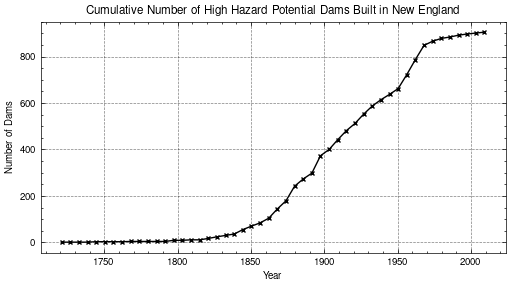

In [7]:
fig, ax = plt.subplots(figsize=(6, 3))
(values, base) = np.histogram(
    NE_NID.query(
        'Year_Completed > 1700 \
        and Year_Completed < 9999 \
        and Hazard_Potential_Classification == "High" \
        ')['Year_Completed'], bins=50)
#evaluate the cumulative
cumulative = np.cumsum(values)
# plot the cumulative function
ax.plot(base[:-1], cumulative, c='k', marker='x')
ax.set_title('Cumulative Number of High Hazard Potential Dams Built in New England')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Dams')
plt.savefig('high_hazard_dams.png', dpi=300, bbox_inches='tight')